<a href="https://colab.research.google.com/github/hoangphat25092005/FashionMNIST/blob/main/FashionMNIST.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1256: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. Use OneVsRestClassifier(LogisticRegression(..)) instead. Leave it to its default value to avoid this warning.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Accuracy score: 0.8384


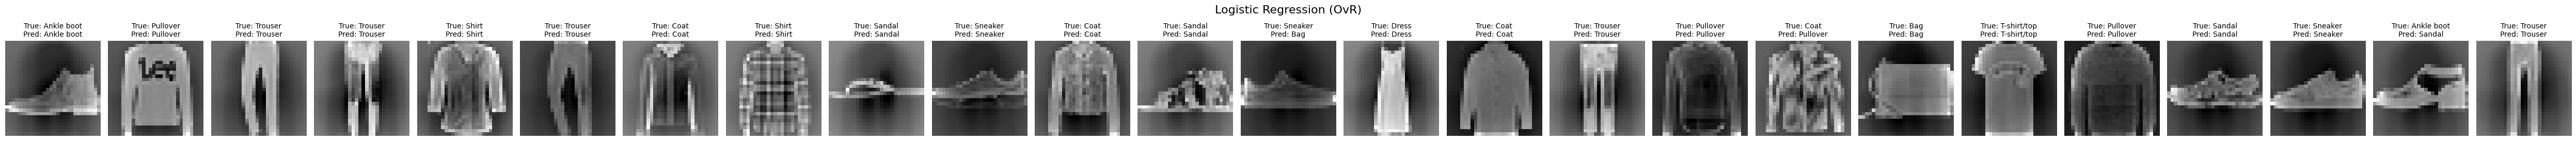

/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Accuracy score: 0.8439


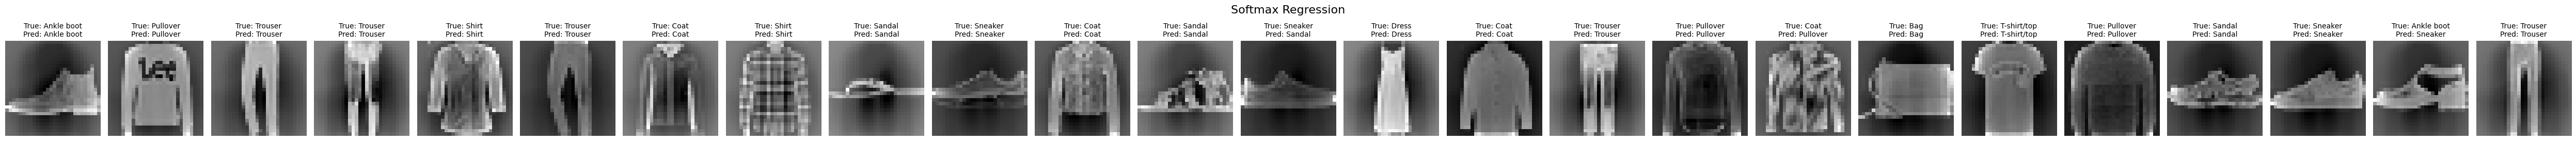

Accuracy score: 0.7889


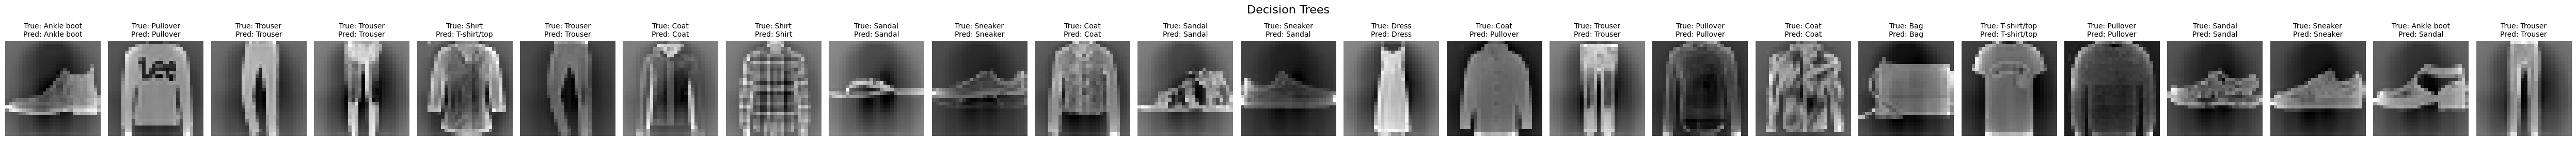

Accuracy score: 0.8526


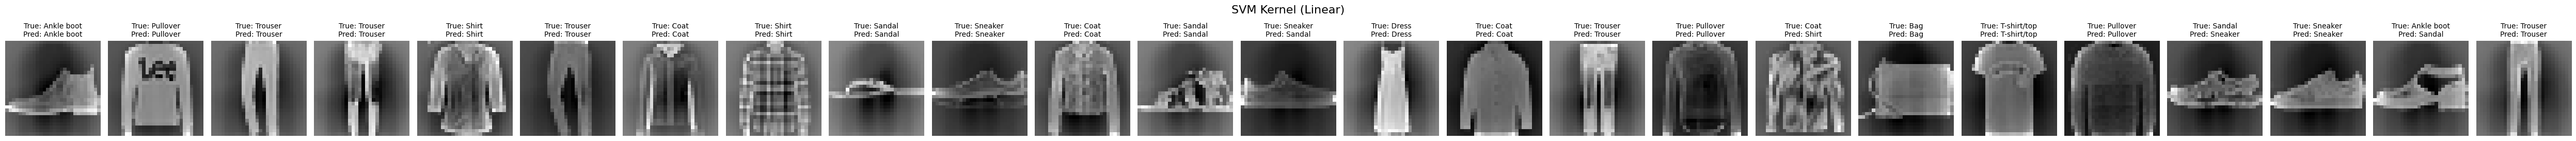

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.multiclass import OneVsRestClassifier
from sklearn.metrics import ConfusionMatrixDisplay, accuracy_score
from tensorflow.keras.datasets import fashion_mnist
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeClassifier

# Load the Fashion MNIST dataset
(X_train, y_train), (X_test, y_test) = fashion_mnist.load_data()
X_train = X_train.reshape(-1, 28*28)
X_test = X_test.reshape(-1, 28*28)

import matplotlib.pyplot as plt
import numpy as np

# Class names for Fashion MNIST
class_names = [
    'T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
    'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot'
]

def plot_predictions(X, y_true, y_pred, n=5, title=""):
    """
    Plot n Fashion MNIST images with their predicted and real labels.
    X: image data (n_samples, 28*28)
    y_true: true labels
    y_pred: predicted labels
    n: number of images to display
    title: plot title
    """
    plt.figure(figsize=(2 * n, 3))
    for i in range(n):
        plt.subplot(1, n, i + 1)
        plt.imshow(X[i].reshape(28, 28), cmap='gray')
        plt.axis('off')
        plt.title(f"True: {class_names[y_true[i]]}\nPred: {class_names[y_pred[i]]}", fontsize=10)
    plt.suptitle(title, fontsize=16)
    plt.tight_layout()
    plt.show()


# Scale data
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train.astype(np.float64))
X_test = scaler.transform(X_test.astype(np.float64))

# Logistic Regression (OvR)
lr = LogisticRegression(max_iter=100, solver='lbfgs', multi_class='ovr')
lr.fit(X_train, y_train)
y_pred_lr = lr.predict(X_test)
print("Accuracy score:", accuracy_score(y_test, y_pred_lr))

plot_predictions(X_test, y_test, y_pred_lr, n=25, title="Logistic Regression (OvR)")

# Softmax Regression (multinomial)
softmax = LogisticRegression(max_iter=100, solver='lbfgs', multi_class='multinomial')
softmax.fit(X_train, y_train)
y_pred_softmax = softmax.predict(X_test)
print("Accuracy score:", accuracy_score(y_test, y_pred_softmax))

plot_predictions(X_test, y_test, y_pred_softmax, n=25, title="Softmax Regression")

#Decision Trees
dt = DecisionTreeClassifier(random_state=42)
dt.fit(X_train, y_train)
y_pred_dt = dt.predict(X_test)
print("Accuracy score:", accuracy_score(y_test, y_pred_dt))

plot_predictions(X_test, y_test, y_pred_dt, n=25, title="Decision Trees")
# SVM (subset for speed)
X_train_svm = X_train[:10000]
y_train_svm = y_train[:10000]
svm = SVC(kernel='rbf', gamma='scale', C=1.0)
svm.fit(X_train_svm, y_train_svm)
y_pred_svm = svm.predict(X_test)
print("Accuracy score:", accuracy_score(y_test, y_pred_svm))

plot_predictions(X_test, y_test, y_pred_svm, n=25, title="SVM Kernel (rbf)")

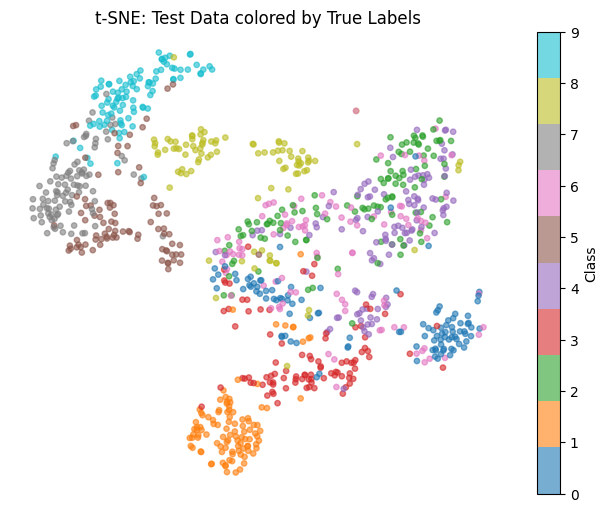

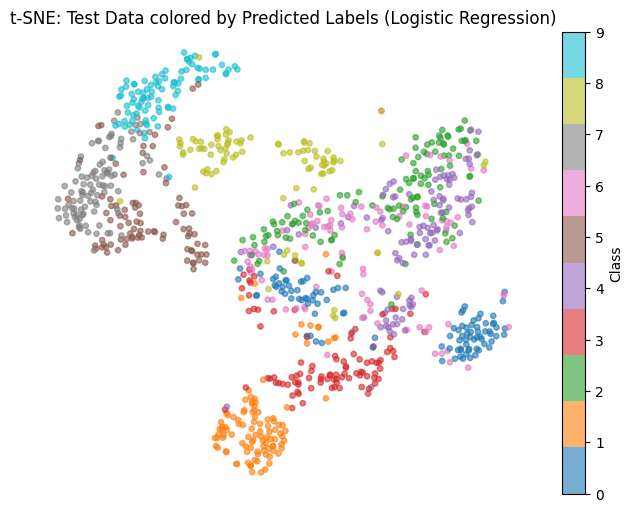

In [ ]:
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt
import numpy as np

# Select a subset for speed (t-SNE can be slow)
n_samples = 1000
X_vis = X_test[:n_samples]
y_true_vis = y_test[:n_samples]
y_pred_vis = y_pred_lr[:n_samples]  # or y_pred_softmax, y_pred_svm

# Dimensionality reduction
tsne = TSNE(n_components=2, random_state=42, perplexity=30)
X_embedded = tsne.fit_transform(X_vis)

def plot_embedding(X_embedded, labels, title):
    plt.figure(figsize=(8, 6))
    scatter = plt.scatter(X_embedded[:, 0], X_embedded[:, 1], c=labels, cmap='tab10', alpha=0.6, s=15)
    plt.title(title)
    plt.colorbar(scatter, ticks=range(10), label='Class')
    plt.xticks([])
    plt.yticks([])
    plt.box(False)
    plt.show()

# Plot before prediction (ground truth)
plot_embedding(X_embedded, y_true_vis, "t-SNE: Test Data colored by True Labels")

# Plot after prediction (model output)
plot_embedding(X_embedded, y_pred_vis, "t-SNE: Test Data colored by Predicted Labels (Logistic Regression)")

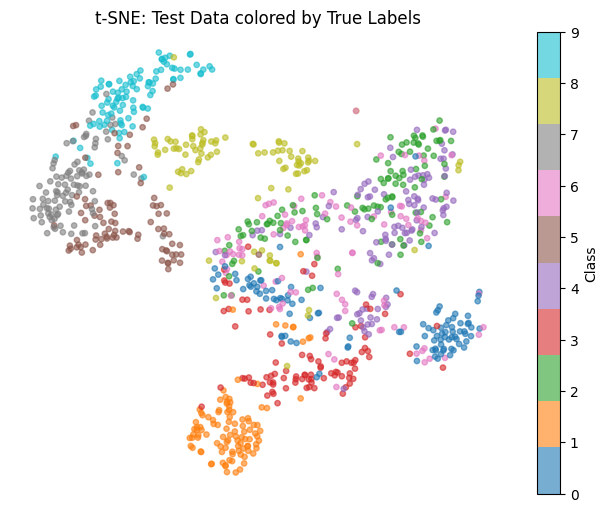

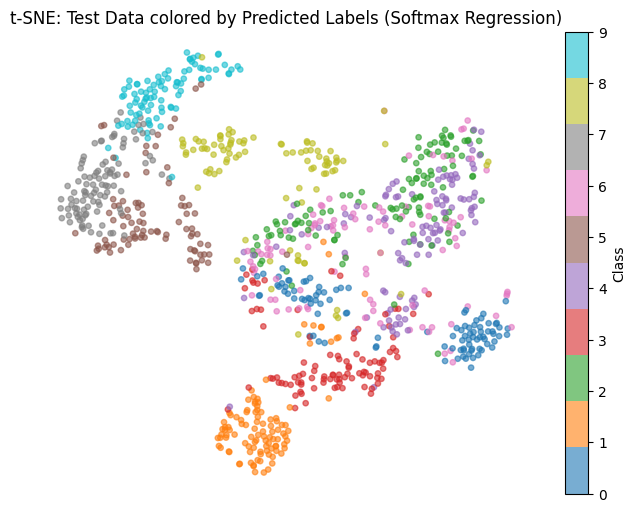

In [ ]:
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt
import numpy as np

# Select a subset for speed (t-SNE can be slow)
n_samples = 1000
X_vis = X_test[:n_samples]
y_true_vis = y_test[:n_samples]
y_pred_vis = y_pred_softmax[:n_samples]  # or y_pred_softmax, y_pred_svm

# Dimensionality reduction
tsne = TSNE(n_components=2, random_state=42, perplexity=30)
X_embedded = tsne.fit_transform(X_vis)

def plot_embedding(X_embedded, labels, title):
    plt.figure(figsize=(8, 6))
    scatter = plt.scatter(X_embedded[:, 0], X_embedded[:, 1], c=labels, cmap='tab10', alpha=0.6, s=15)
    plt.title(title)
    plt.colorbar(scatter, ticks=range(10), label='Class')
    plt.xticks([])
    plt.yticks([])
    plt.box(False)
    plt.show()

# Plot before prediction (ground truth)
plot_embedding(X_embedded, y_true_vis, "t-SNE: Test Data colored by True Labels")

# Plot after prediction (model output)
plot_embedding(X_embedded, y_pred_vis, "t-SNE: Test Data colored by Predicted Labels (Softmax Regression)")

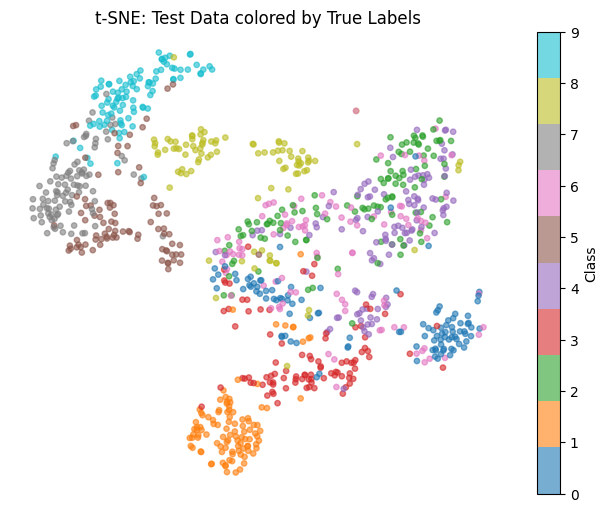

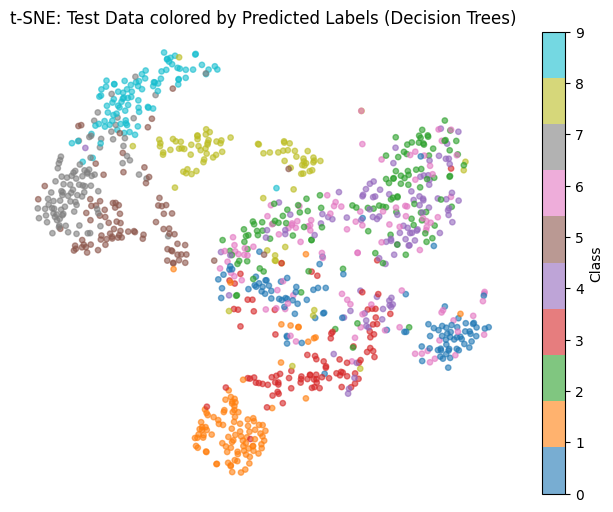

In [ ]:
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt
import numpy as np

# Select a subset for speed (t-SNE can be slow)
n_samples = 1000
X_vis = X_test[:n_samples]
y_true_vis = y_test[:n_samples]
y_pred_vis = y_pred_dt[:n_samples]  # or y_pred_softmax, y_pred_svm

# Dimensionality reduction
tsne = TSNE(n_components=2, random_state=42, perplexity=30)
X_embedded = tsne.fit_transform(X_vis)

def plot_embedding(X_embedded, labels, title):
    plt.figure(figsize=(8, 6))
    scatter = plt.scatter(X_embedded[:, 0], X_embedded[:, 1], c=labels, cmap='tab10', alpha=0.6, s=15)
    plt.title(title)
    plt.colorbar(scatter, ticks=range(10), label='Class')
    plt.xticks([])
    plt.yticks([])
    plt.box(False)
    plt.show()

# Plot before prediction (ground truth)
plot_embedding(X_embedded, y_true_vis, "t-SNE: Test Data colored by True Labels")

# Plot after prediction (model output)
plot_embedding(X_embedded, y_pred_vis, "t-SNE: Test Data colored by Predicted Labels (Decision Trees)")

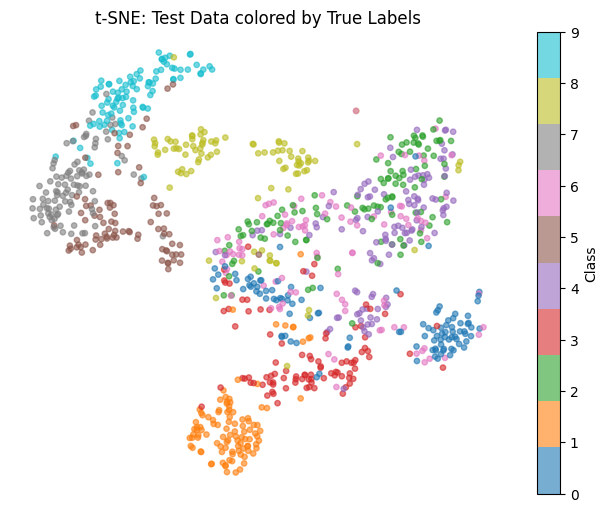

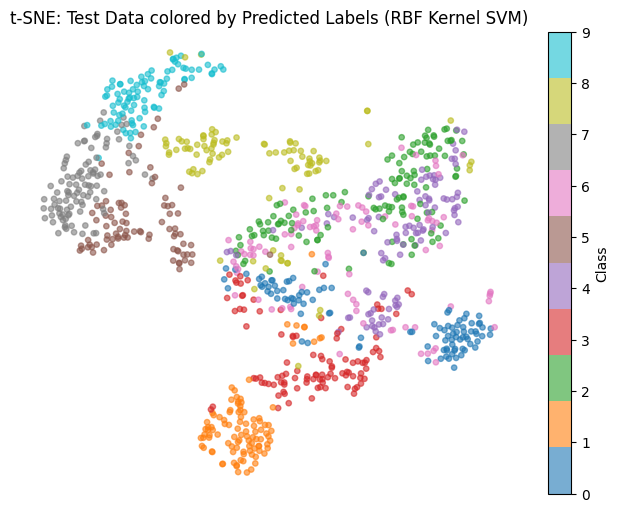

In [ ]:
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt
import numpy as np

# Select a subset for speed (t-SNE can be slow)
n_samples = 1000
X_vis = X_test[:n_samples]
y_true_vis = y_test[:n_samples]
y_pred_vis = y_pred_svm[:n_samples]  # or y_pred_softmax, y_pred_svm

# Dimensionality reduction
tsne = TSNE(n_components=2, random_state=42, perplexity=30)
X_embedded = tsne.fit_transform(X_vis)

def plot_embedding(X_embedded, labels, title):
    plt.figure(figsize=(8, 6))
    scatter = plt.scatter(X_embedded[:, 0], X_embedded[:, 1], c=labels, cmap='tab10', alpha=0.6, s=15)
    plt.title(title)
    plt.colorbar(scatter, ticks=range(10), label='Class')
    plt.xticks([])
    plt.yticks([])
    plt.box(False)
    plt.show()

# Plot before prediction (ground truth)
plot_embedding(X_embedded, y_true_vis, "t-SNE: Test Data colored by True Labels")

# Plot after prediction (model output)
plot_embedding(X_embedded, y_pred_vis, "t-SNE: Test Data colored by Predicted Labels (RBF Kernel SVM)")